In [1]:
import pandas as pd
import numpy as np
from sklearn import svm
from sklearn.metrics import classification_report, confusion_matrix
import itertools
import scipy.optimize as opt
from sklearn.metrics import f1_score
from sklearn.metrics import jaccard_score
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline 

In [2]:
df = pd.read_csv("cell_samples.csv")


In [3]:
df.head()

,ID,Clump,UnifSize,UnifShape,MargAdh,SingEpiSize,BareNuc,BlandChrom,NormNucl,Mit,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


### Understanding the data

In [6]:
columns=pd.read_csv('C:/Users/keert/OneDrive/Desktop/documentsnotepad/descriptionfeatures1.txt',sep='=')
columns=columns.reset_index()
columns.columns=['cols','abbrevationnames']

In [7]:
columns

,cols,abbrevationnames
0,Clump,Clump thickness
1,UnifSize,Uniformity of cell size
2,UnifShape,Uniformity of cell shape
3,MargAdh,Marginal adhesion
4,SingEpiSize,Single epithelial cell size
5,BareNuc,Bare nuclei
6,BlandChrom,Bland chromatin
7,NormNucl,Normal nucleoli
8,Mit,Mitoses
9,Class,Benign or malignant


In [11]:
df["Class"].value_counts()

2    458
4    241
Name: Class, dtype: int64

### Distribution of classes based on the clump thickness

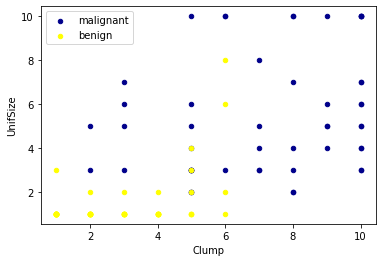

In [12]:
ax = df[df['Class'] == 4][0:50].plot(kind='scatter', x='Clump', y='UnifSize', color='DarkBlue', label='malignant');
df[df['Class'] == 2][0:50].plot(kind='scatter', x='Clump', y='UnifSize', color='Yellow', label='benign', ax=ax);
plt.show()

### Data preprocessing 

In [13]:
df.dtypes

ID              int64
Clump           int64
UnifSize        int64
UnifShape       int64
MargAdh         int64
SingEpiSize     int64
BareNuc        object
BlandChrom      int64
NormNucl        int64
Mit             int64
Class           int64
dtype: object

In [14]:
df["BareNuc"].value_counts()

1     402
10    132
2      30
5      30
3      28
8      21
4      19
?      16
9       9
7       8
6       4
Name: BareNuc, dtype: int64

In [16]:
df['BareNuc'] = df['BareNuc'].replace(['?'],0)

In [17]:
df["BareNuc"].value_counts()

1     402
10    132
2      30
5      30
3      28
8      21
4      19
0      16
9       9
7       8
6       4
Name: BareNuc, dtype: int64

In [18]:
#df = df[pd.to_numeric(df['BareNuc'], errors='coerce').notnull()]
#df['BareNuc'] = df['BareNuc'].astype('int')
#df.dtypes

In [21]:
df['BareNuc'] = df['BareNuc'].astype('int')

In [22]:
df.dtypes

ID             int64
Clump          int64
UnifSize       int64
UnifShape      int64
MargAdh        int64
SingEpiSize    int64
BareNuc        int32
BlandChrom     int64
NormNucl       int64
Mit            int64
Class          int64
dtype: object

In [23]:
X = df[['Clump', 'UnifSize', 'UnifShape', 'MargAdh', 'SingEpiSize', 'BareNuc', 'BlandChrom', 'NormNucl', 'Mit']].values
X[0:5]

array([[ 5,  1,  1,  1,  2,  1,  3,  1,  1],
       [ 5,  4,  4,  5,  7, 10,  3,  2,  1],
       [ 3,  1,  1,  1,  2,  2,  3,  1,  1],
       [ 6,  8,  8,  1,  3,  4,  3,  7,  1],
       [ 4,  1,  1,  3,  2,  1,  3,  1,  1]], dtype=int64)

In [24]:
df['Class'] = df['Class'].astype('int')
y = np.asarray(df['Class'])
y [0:5]

array([2, 2, 2, 2, 2])

### Trrain and and Test data set

In [25]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (559, 9) (559,)
Test set: (140, 9) (140,)


Modeling (SVM with Scikit-learn)
The SVM algorithm offers a choice of kernel functions for performing its processing. Basically, mapping data into a higher dimensional space is called kernelling. The mathematical function used for the transformation is known as the kernel function, and can be of different types, such as:

1.Linear
2.Polynomial
3.Radial basis function (RBF)
4.Sigmoid
Each of these functions has its characteristics, its pros and cons, and its equation, but as there's no easy way of knowing which function performs best with any given dataset. We usually choose different functions in turn and compare the results. Let's just use the default, RBF (Radial Basis Function).

In [26]:
model = svm.SVC(kernel='rbf')
model.fit(X_train, y_train) 

SVC()

In [27]:
y_pred = model.predict(X_test)
y_pred [0:5]

array([4, 2, 2, 4, 2])

#### Evaluation

In [31]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization') 
        
    print(cm)
       
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes) 
    
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),horizontalalignment="center",color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
        

              precision    recall  f1-score   support

           2       0.99      0.99      0.99        88
           4       0.98      0.98      0.98        52

    accuracy                           0.99       140
   macro avg       0.98      0.98      0.98       140
weighted avg       0.99      0.99      0.99       140

Confusion matrix, without normalization
[[87  1]
 [ 1 51]]


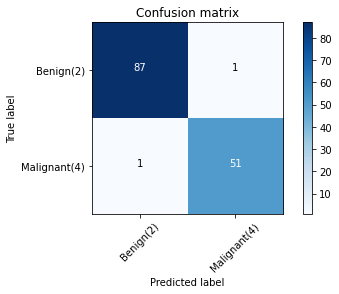

In [32]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred, labels=[2,4])
np.set_printoptions(precision=2)

print (classification_report(y_test, y_pred))

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Benign(2)','Malignant(4)'],normalize= False,  title='Confusion matrix')

In [36]:
## f1_score and jaccard score

In [33]:
f1_score(y_test, y_pred, average='weighted')

0.9857142857142858

In [34]:
jaccard_score(y_test, y_pred,pos_label=2)

0.9775280898876404

In [ ]:
####  kernel='linear' 